<a href="https://colab.research.google.com/github/SrihithaReddy13/100-days-of-code/blob/master/Twitter_Sentiment_Analysis_dummy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize

In [ ]:
twitter_df=pd.read_csv('twitter.csv')

In [ ]:
twitter_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
twitter_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


##EDA

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


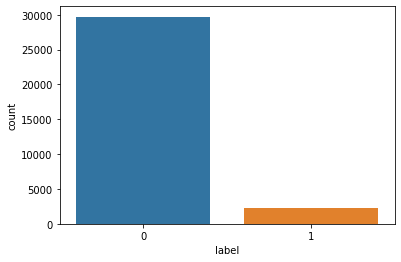

In [ ]:
sns.countplot(twitter_df.label)

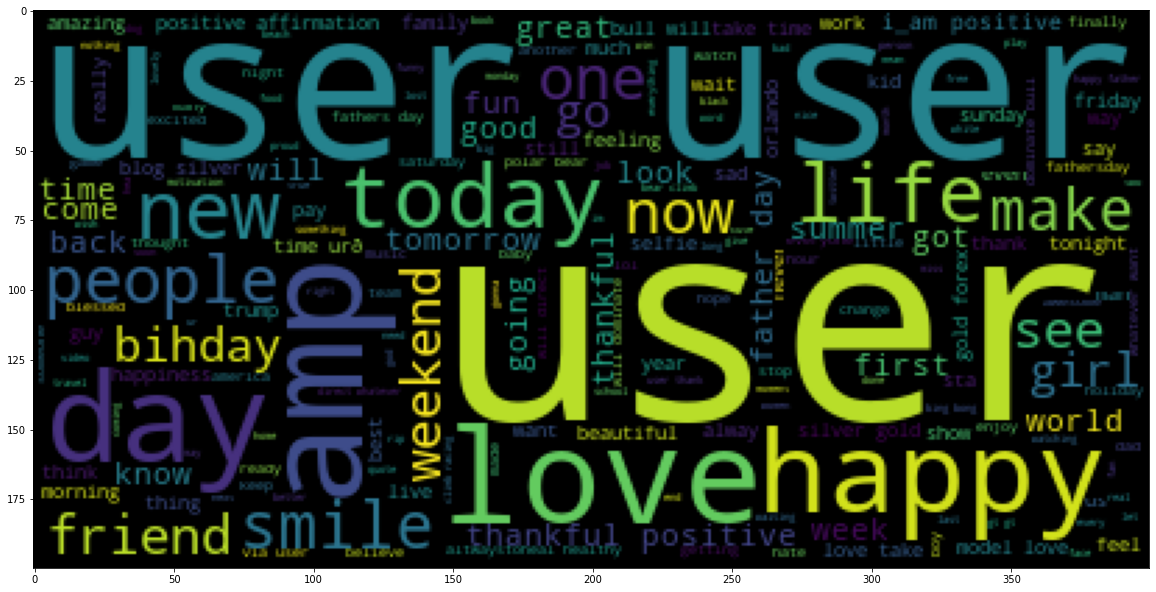

In [ ]:
from wordcloud import WordCloud
sentences = twitter_df['tweet'].tolist()
sentences_as_one_string = " ".join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [ ]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        #print(i)
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
    # extracting hashtags from positive tweets
HT_positive = hashtag_extract(twitter_df['tweet'][twitter_df['label'] == 1])
    # extracting hashtags from negative tweets
HT_negative = hashtag_extract(twitter_df['tweet'][twitter_df['label'] == 0])# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])

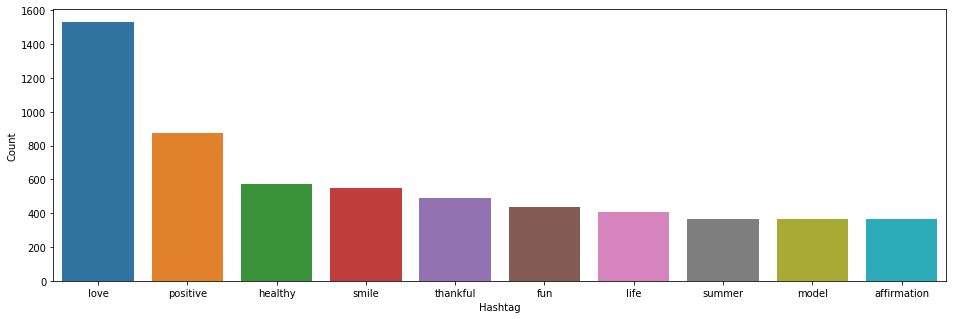

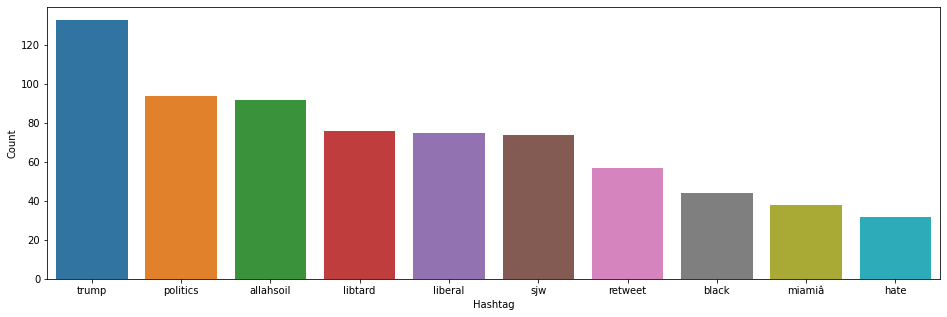

In [ ]:
b=nltk.FreqDist(HT_negative)
a=nltk.FreqDist(HT_positive)
e1=pd.DataFrame({'Hashtag':list(b.keys()),'Count':list(b.values())})
e1=e1.nlargest(columns="Count",n=10)
e2=pd.DataFrame({'Hashtag':list(a.keys()),'Count':list(a.values())})
e2=e2.nlargest(columns="Count",n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e1,x="Hashtag",y="Count")
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e2,x="Hashtag",y="Count")
ax.set(ylabel='Count')
plt.show()

In [ ]:
twitter_df.shape

(31962, 3)

In [ ]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Let's test the newly added function
tweets_df_clean = twitter_df['tweet'].apply(message_cleaning)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning,dtype="uint8")
tweets_countvectorizer =vectorizer.fit_transform(twitter_df['tweet'])

In [ ]:
tweets = pd.DataFrame(tweets_countvectorizer.toarray())
X = tweets

In [ ]:
y = twitter_df['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

###NAIVE BAYES CLASSIFIER USING A DATASET WITH LABELS

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_predict_test = NB_classifier.predict(X_test)

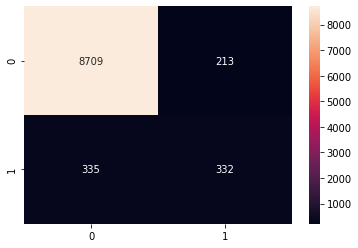

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True,fmt="d")

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8922
           1       0.61      0.50      0.55       667

    accuracy                           0.94      9589
   macro avg       0.79      0.74      0.76      9589
weighted avg       0.94      0.94      0.94      9589



###LOGISTIC LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
y_predict_test_llr=clf.predict(X_test)

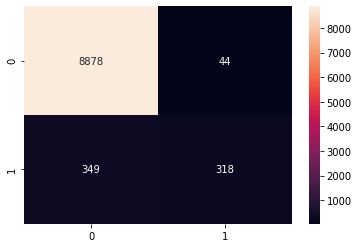

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict_test_llr)
sns.heatmap(cm, annot=True,fmt="d")

In [ ]:
print(classification_report(y_test, y_predict_test_llr))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8922
           1       0.88      0.48      0.62       667

    accuracy                           0.96      9589
   macro avg       0.92      0.74      0.80      9589
weighted avg       0.96      0.96      0.95      9589

